In [16]:
## Import necessary modules
import pygmt
import pandas as pd
#pd.set_option('display.max_rows', None)

## gmt configurations
## character encodeing for octal code symbols
pygmt.config(PS_CHAR_ENCODING="Standard+")

In [17]:
## Set input data file
## Format input file "Code Lat Long H Ve sVe Vn sN Vu sVu" with this header line
vel_df = pd.read_csv("data/diff_maps_SXETIKOS.txt", sep=" ", comment="#")
vel_df['vzero']=0
#vel = vel_df.head()
hvel = vel_df[['Long','Lat', 'Ve','Vn', 'sVe','sVn','sVu', 'Code']]
#hvel
vvel = vel_df[['Long','Lat', 'vzero','Vu', 'sVe','sVu','sVu', 'Code']]
#vvel

## create scale dataframe for vector magnitude
vsc={
    'Long': [23.1],
    'Lat': [37.55],
    'Ve': [10],
    'Vn': [0],
    'sVe': [0],
    'sVn': [0],
    'sV': [0],
    'Code': ['10 mm/y']
}


In [18]:
## add font to plot label on DataFrame
vel_df['font']='9p,Helvetica,black'
vel_df['tpos']="MR"
vtext_dict={
    'Long': vel_df['Long']-0.03,
    'Lat': vel_df['Lat']+0.005,
    'angle': vel_df['vzero'],
    'font': vel_df['font'],
    'tpos': vel_df['tpos'],
    'Code': vel_df['Code']
}

#vtext_items = vtext_dict.items()
#vtext_list = list(vtext_items)

vtext = pd.DataFrame(vtext_dict)
#vtext.to_csv('labels', index=False, header=False, sep=' ')

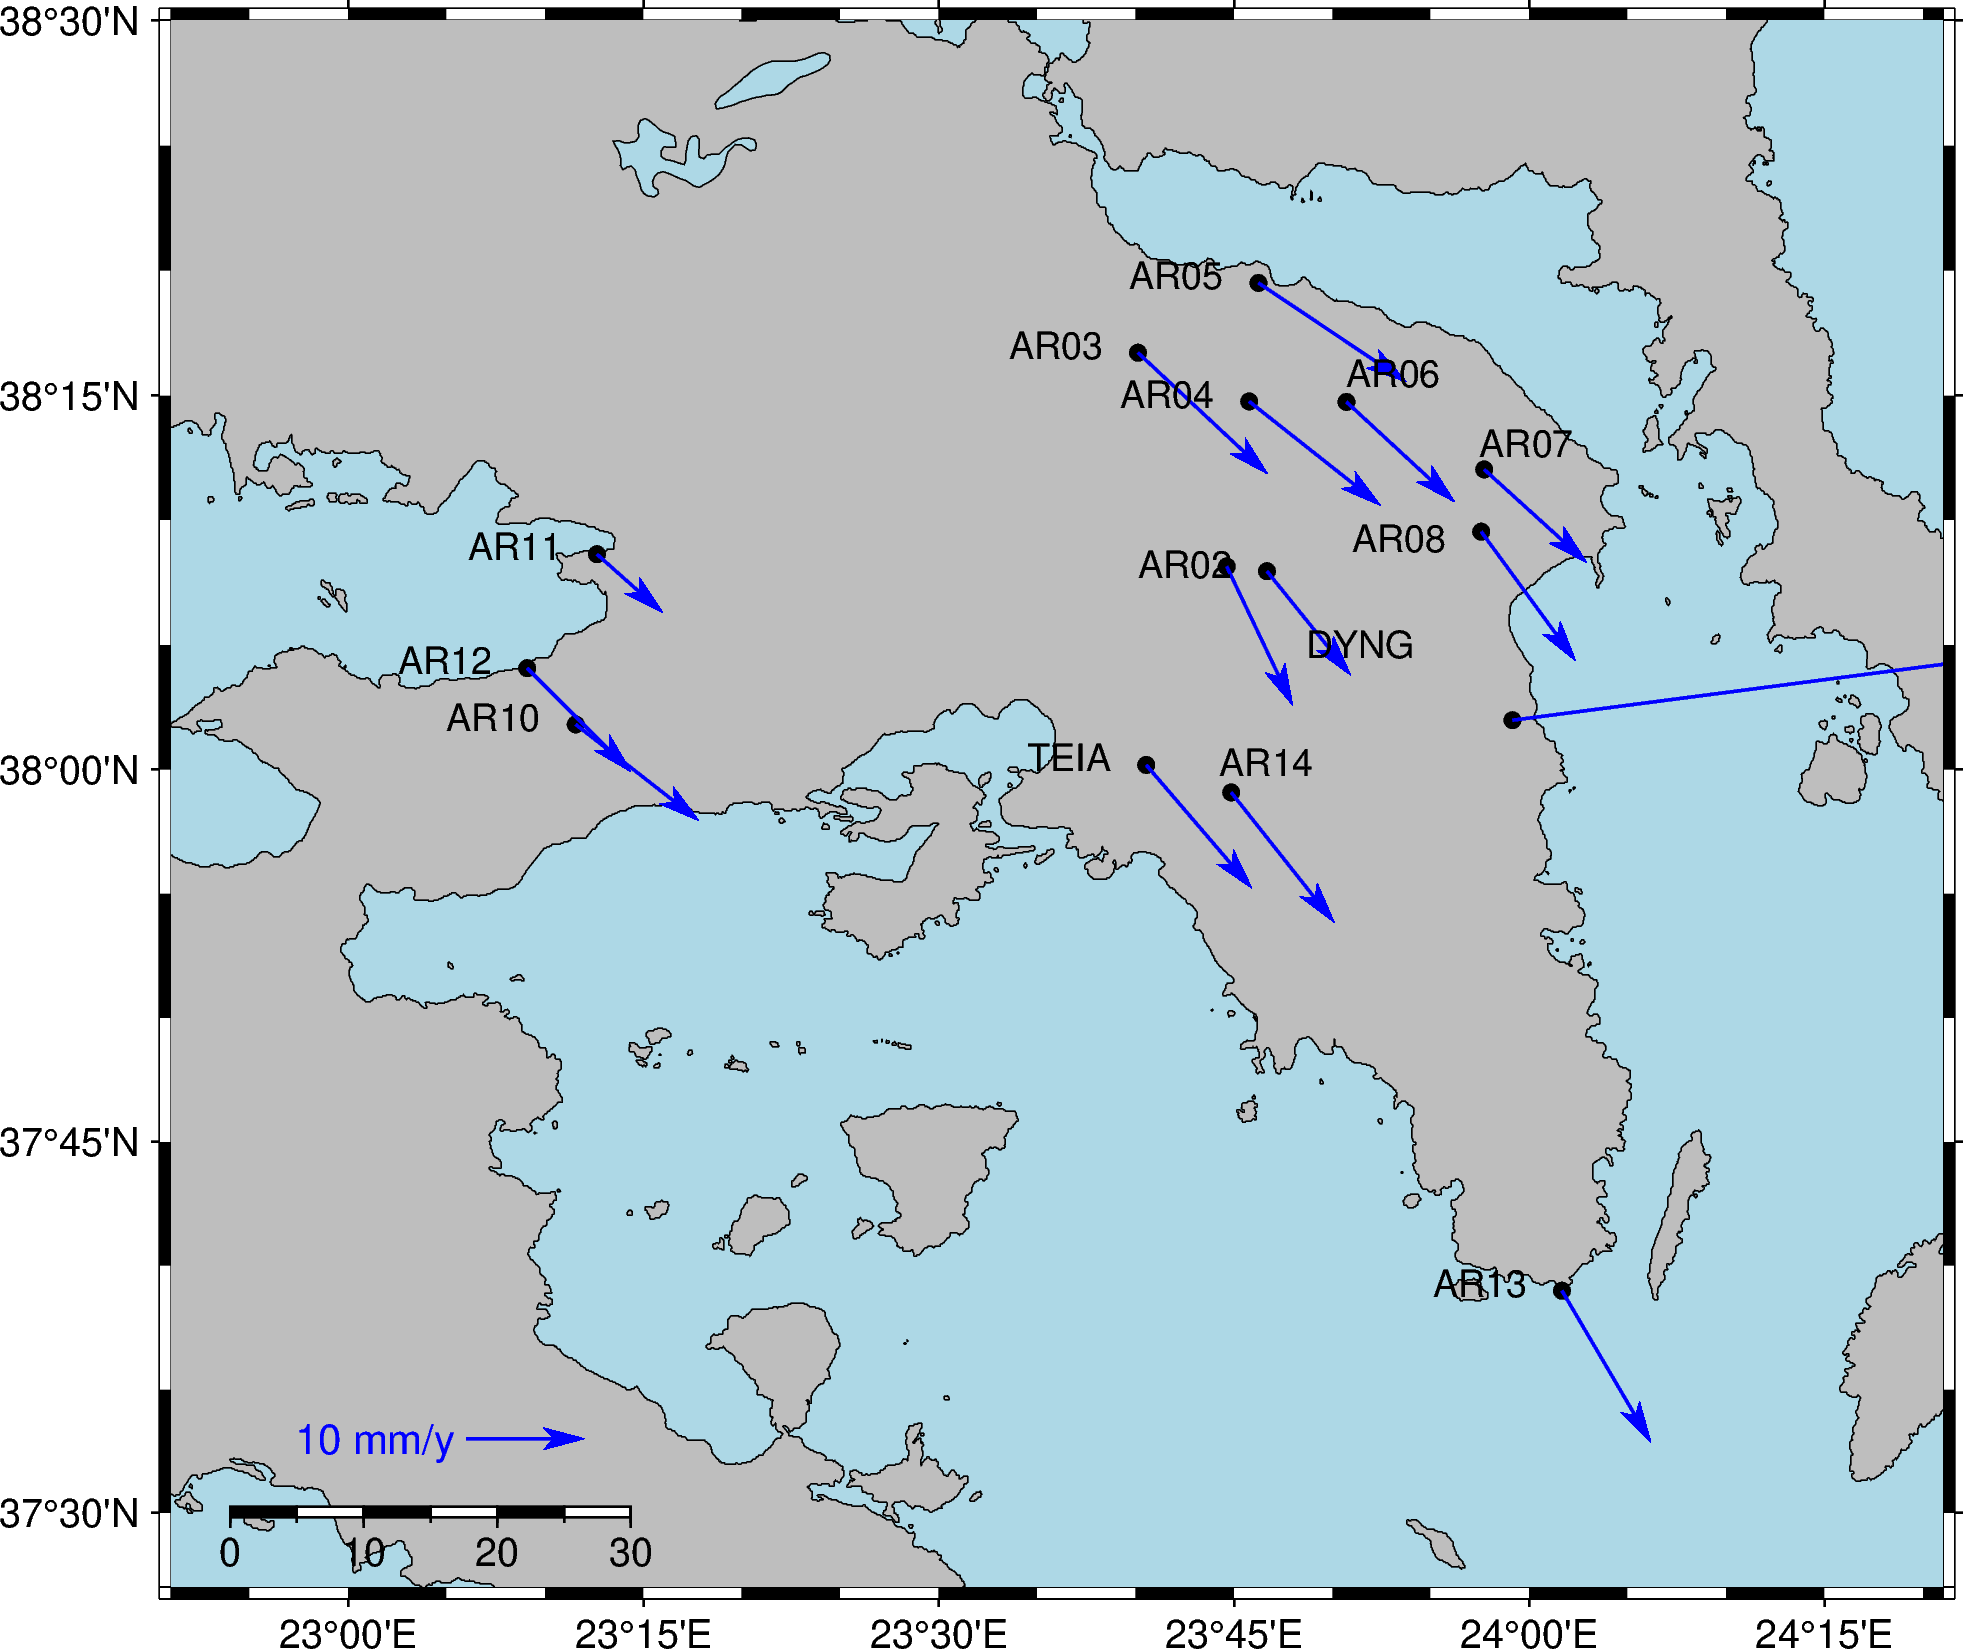

In [19]:
## Plot Horizontal velocities for each cite
fig = pygmt.Figure()
fig.basemap(region=[22.85, 24.35, 37.45, 38.5], projection="M15c", frame=True)
fig.coast(
    shorelines=True,
    land="grey",
    water="lightblue",
    map_scale="jBL+w30k+o0.5c/0.5c+f"
)
#pygmt.makecpt(cmap="globe", series=[-6000, 3000])
#fig.grdimage(grid='./earth_relief_15s.grd', projection="M15c", region=[22.85, 24.35, 37.45, 38.5], frame="a")
#fig.grdimage(grid="earth_relief_15s.grd", C=r, region=[23, 24.5, 37.5, 38.5],  E=100)
# store focal mechanisms parameters in a dict
# focal_mechanism = dict(strike=330, dip=30, rake=90, magnitude=3)

# pass the focal mechanism data to meca in addition to the scale and event
# location
# fig.meca(focal_mechanism, scale="1c", longitude=23.5, latitude=36, depth=12.0)

fig.plot(x=hvel.Long, y=hvel.Lat, style="c0.15c", color="black")

fig.velo(
    data=hvel,
    pen="0.7p,blue",
    uncertaintycolor  ="lightblue1",
    line=True,
    spec="e0.1/0.39/0",
    frame=["WSne"],
    vector="0.35c+e+gblue",
)

fig.velo(
    data=vsc,
    pen="0.7p,blue",
    uncertaintycolor  ="lightblue1",
    line=True,
    spec="e0.1/0.39/10",
    frame=["WSne"],
    vector="0.35c+e+gblue",
)
#vtext.to_csv(r'output.txt', header=None, index=None, sep=' ', mode='a')


fig.text(textfiles='labels', angle=True, font=True, justify=True)

fig.show()

In [5]:
fig.savefig("plots/vhor.png")

In [6]:
## Plot vertical velocities for each cite
fig = pygmt.Figure()
fig.basemap(region=[23, 24.5, 37.5, 38.5], projection="M15c", frame=True)
fig.coast(
    shorelines=True,
    land="grey",
    water="lightblue")


fig.plot(x=vel.Long, y=vel.Lat, style="c0.15c", color="black")

fig.velo(
    data=vel,
    pen="0.7p,red",
    uncertaintycolor  ="lightblue1",
    line=True,
    spec="e0.05/0.39/11",
    frame=["WSne"],
    vector="0.35c+e+gred",
)

fig.show()

NameError: name 'vel' is not defined